<a href="https://colab.research.google.com/github/ooooda/ImageProcessing/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAB 2


---

In [2]:
import cv2  # Import OpenCV library for image processing
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

**Step 1:** Find a good-resolution image of Lena online (e.g., *.jpg) and import it locally (use any programming language)

The original image



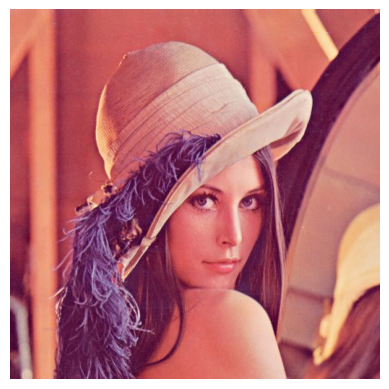

In [9]:
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = 'images/lena_color.jpg'
    lena_img = cv2.imread(image_path)
    print("The original image\n")
    display_image(lena_img)

**Step 2:** If not monochrome, be sure to convert it into grayscale (aka assign a single intensity value to each pixel) first.

The new image is grayscale



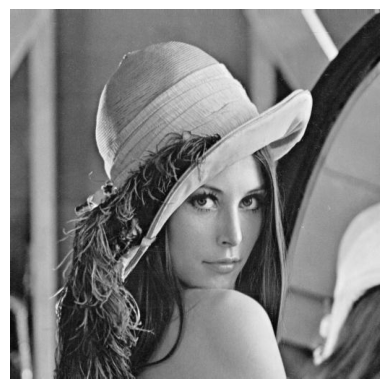

In [10]:
def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

if __name__ == '__main__':
    grayscale_lena_img = cv2.cvtColor(lena_img, cv2.COLOR_BGR2GRAY)
    print("The new image is grayscale\n")
    display_image(grayscale_lena_img)

**Step 3:** Find a way to extract the histogram (using PDF and CDF) of your imported image.

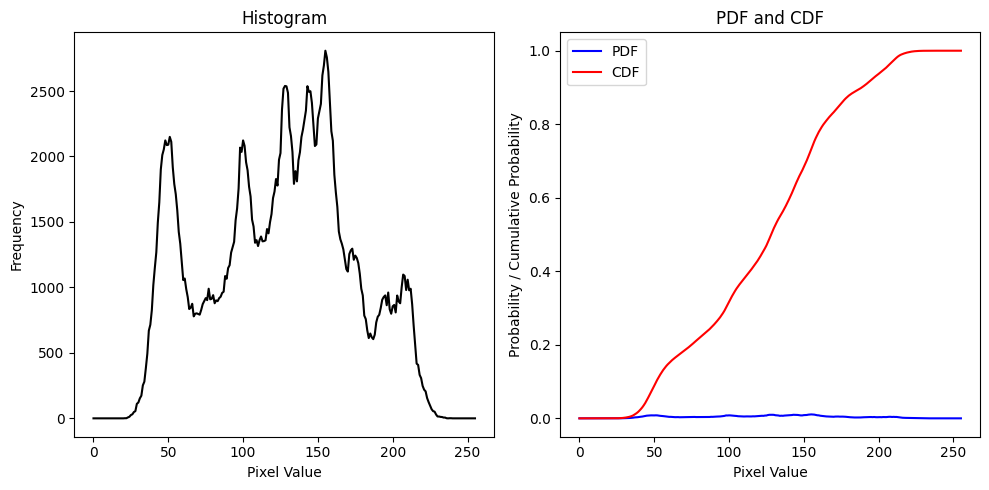

In [11]:
def compute_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel()  # Flatten the histogram into a 1D array

    # Compute the PDF (Probability Density Function)
    pdf = hist / hist.sum()

    # Compute the CDF (Cumulative Distribution Function)
    cdf = np.cumsum(pdf)

    return hist, pdf, cdf

def plot_histogram(hist, pdf, cdf):
    # Plot the Histogram
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Plot the PDF and CDF
    plt.subplot(1, 2, 2)
    plt.plot(pdf, color='blue', label='PDF')
    plt.plot(cdf, color='red', label='CDF')
    plt.title('PDF and CDF')
    plt.xlabel('Pixel Value')
    plt.ylabel('Probability / Cumulative Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Compute the histogram, PDF, and CDF
    hist, pdf, cdf = compute_histogram(grayscale_lena_img)

    # Plot the histogram, PDF, and CDF
    plot_histogram(hist, pdf, cdf)

**Step 4:** Perform HE and display the new (enhanced) version of your image together with the new (equalized) histogram.

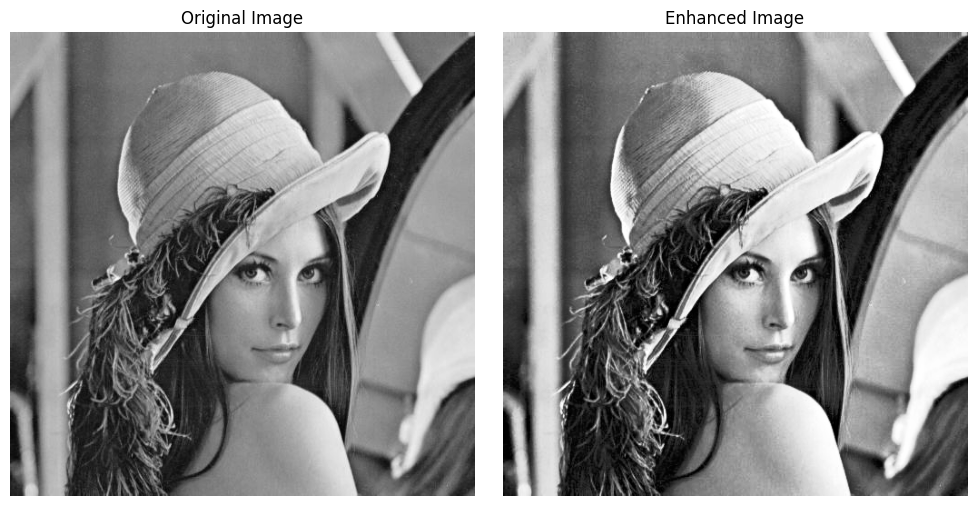

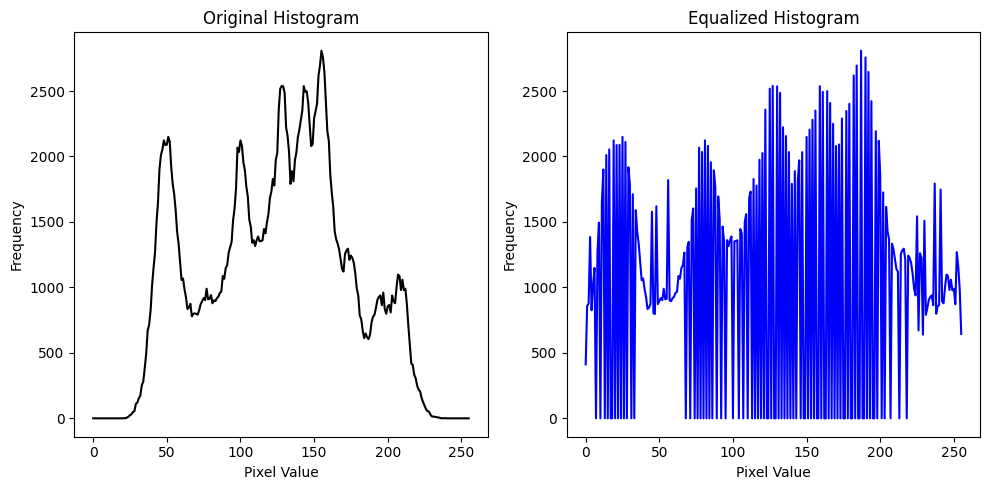

In [13]:
def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
    equalized_hist = equalized_hist.ravel()
    equalized_pdf = equalized_hist / equalized_hist.sum()
    equalized_cdf = np.cumsum(equalized_pdf)
    return equalized_image, equalized_hist, equalized_pdf, equalized_cdf

def plot_images_and_histogram(enhanced_image, original_hist, equalized_hist):
    # Plot the original and enhanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_lena_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Plot the original and equalized histograms
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(original_hist, color='black')
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.plot(equalized_hist, color='blue')
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    enhanced_image, equalized_hist, equalized_pdf, equalized_cdf = histogram_equalization(grayscale_lena_img)
    original_hist = cv2.calcHist([grayscale_lena_img], [0], None, [256], [0, 256])
    original_hist = original_hist.ravel()

    # Plot the original and enhanced images with the histograms
    plot_images_and_histogram(enhanced_image, original_hist, equalized_hist)
